# Mixture of Gaussians BEAM Demo

### Step 1: Load all necessary modules and generate the data

/Users/andrewyang/anaconda3/lib/python3.11/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1699448804225/work/torch/csrc/tensor/python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)


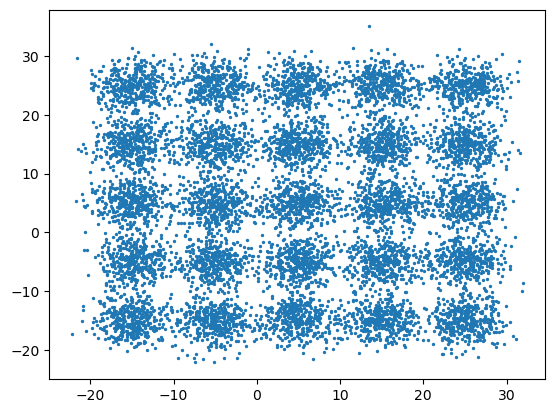

In [1]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../')
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from beam import BEAM, load

def gaussian_grid(width, height, scale, n_total_samples):
    cov = np.eye(2) * scale
    samples_per_center = int(n_total_samples / (width * height))
    X = []
    for i in range(height):
        for j in range(width):
            mean = np.array([i, j])
            X.append(np.random.multivariate_normal(mean, cov, 
                                                   samples_per_center))
    final = np.vstack(X)
    final[:, 0] -= (height - 1) / 2
    final[:, 1] -= (width - 1) / 2
    return final

X = gaussian_grid(5, 5, 0.05, 10000) * 10 + 5
np.random.shuffle(X)
img = plt.scatter(x=X[:, 0], y=X[:, 1], s=2)

### Step 2: Train the RBM (no adversary)

In [2]:
model = BEAM(
    n_vis=2,
    n_hid=20
)
model.fit(
    X = X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=400,
    batch_size=50,
    gamma=1,
    gamma_delay=25,
    rng_seed=0,
    verbose=True,
    checkpoint_path=f'{directory_path}/beam_checkpoints/beam_mog_demo.pth'
)

epoch: 005 of 400 | recon_loss: 16.562999725341797
epoch: 010 of 400 | recon_loss: 8.803000450134277
epoch: 015 of 400 | recon_loss: 5.49399995803833
epoch: 020 of 400 | recon_loss: 4.427999973297119
epoch: 025 of 400 | recon_loss: 3.9660000801086426
epoch: 030 of 400 | recon_loss: 3.937999963760376


KeyboardInterrupt: 

### Step 3: Visualize the learned distribution

tensor([4.4483, 4.0552], grad_fn=<ExpBackward0>)


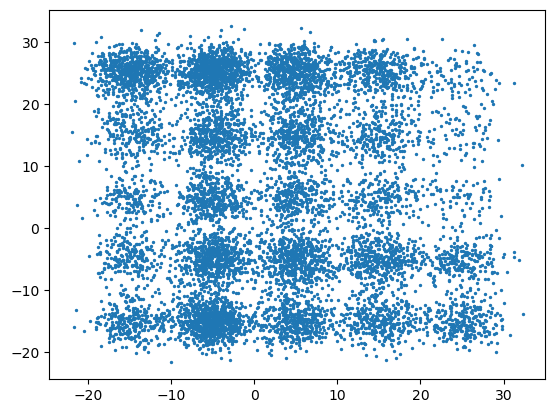

In [5]:
model = load(f'{directory_path}/beam_checkpoints/beam_mog_demo.pth',
                 f'{directory_path}/beam_checkpoints/beam_mog_demo.json')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=200
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)

### Repeat Step 2 for BEAM with adversarial training

In [9]:
model_adversarial = BEAM(
    n_vis=2,
    n_hid=20
)
model_adversarial.fit_autograd(
    X = X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=400,
    batch_size=100,
    gamma=0.001,
    gamma_delay=100,
    rng_seed=0,
    verbose=True,
    checkpoint_path=f'{directory_path}/beam_checkpoints/beam_mog_demo_adv.pth'
)

epoch: 005 of 400 | recon_loss: 28.489999771118164
epoch: 010 of 400 | recon_loss: 14.86400032043457
epoch: 015 of 400 | recon_loss: 9.786999702453613
epoch: 020 of 400 | recon_loss: 7.000999927520752
epoch: 025 of 400 | recon_loss: 5.416999816894531
epoch: 030 of 400 | recon_loss: 4.38100004196167
epoch: 035 of 400 | recon_loss: 3.6689999103546143
epoch: 040 of 400 | recon_loss: 3.3450000286102295
epoch: 045 of 400 | recon_loss: 3.2200000286102295
epoch: 050 of 400 | recon_loss: 2.9760000705718994
epoch: 055 of 400 | recon_loss: 2.938999891281128
epoch: 060 of 400 | recon_loss: 2.6679999828338623
epoch: 065 of 400 | recon_loss: 2.703000068664551
epoch: 070 of 400 | recon_loss: 2.63700008392334
epoch: 075 of 400 | recon_loss: 2.632999897003174
epoch: 080 of 400 | recon_loss: 2.3940000534057617
epoch: 085 of 400 | recon_loss: 2.431999921798706
epoch: 090 of 400 | recon_loss: 2.3919999599456787
epoch: 095 of 400 | recon_loss: 2.0999999046325684
epoch: 100 of 400 | recon_loss: 2.059000015

### Repeat Step 3 for BEAM adversarial traiing

tensor([5.2513, 4.8877], grad_fn=<ExpBackward0>)


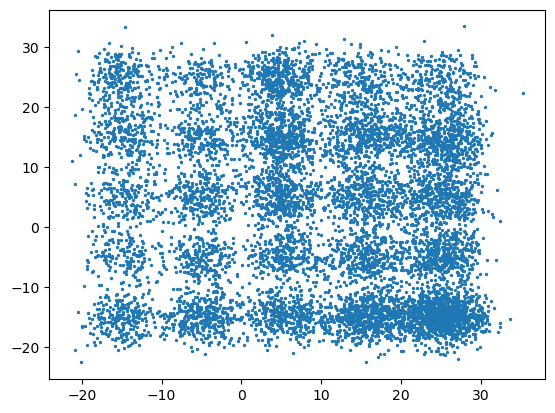

In [10]:
model = load(f'{directory_path}/beam_checkpoints/beam_mog_demo_adv.pth',
                 f'{directory_path}/beam_checkpoints/beam_mog_demo_adv.json')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=200
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)